In [5]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
from scipy import stats

In [9]:
data = web.DataReader(['AAPL'], data_source='yahoo', start='1-1-2020', end='12-31-2020')['Adj Close']
data

Symbols,AAPL
Date,
2019-12-31,72.443558
2020-01-02,74.096443
2020-01-03,73.376083
2020-01-06,73.960770
2020-01-07,73.612930
...,...
2020-12-24,131.352829
2020-12-28,136.050766
2020-12-29,134.239273


In [10]:
data['return'] = np.log(data['AAPL']/data['AAPL'].shift(1))

In [11]:
data.head()

Symbols,AAPL,return
Date,,
2019-12-31,72.443558,NaN
2020-01-02,74.096443,0.022560
2020-01-03,73.376083,-0.009769
2020-01-06,73.960770,0.007937
2020-01-07,73.612930,-0.004714


## Value at Risk = Volatility * Confidenece interval * sqrt(time) * 100

In [12]:
vol = data['return'].std()       # compute standard deviation

In [13]:
vol

0.029403316510904443

In [14]:
confidence_interval = stats.norm.ppf(0.99) 

In [15]:
confidence_interval

2.3263478740408408

In [16]:
VaR = confidence_interval * vol * np.sqrt(1)*100

In [17]:
VaR

6.84023428548925

## Test

In [20]:
CI = float(input('Confidenece Interval: ')) / 100
Time = int(input('Time Horizen: '))
CI = stats.norm.ppf(CI)
time = np.sqrt(Time)
vol = data['return'][2:].std()

Value_at_Risk = vol * time * CI * 100

print(Value_at_Risk)


Confidenece Interval: 99
Time Horizen: 1
6.84023428548925


In [47]:
data['return'][2:]

Date
2020-01-03   -0.009769
2020-01-06    0.007937
2020-01-07   -0.004714
2020-01-08    0.015958
2020-01-09    0.021018
                ...   
2020-12-24    0.007683
2020-12-28    0.035141
2020-12-29   -0.013404
2020-12-30   -0.008563
2020-12-31   -0.007732
Name: return, Length: 252, dtype: float64

In [21]:
data_hist = web.DataReader(['AAPL'], data_source='yahoo', start='1-1-2017', end='12-31-2020')['Adj Close']

In [22]:
data_hist.head()

Symbols,AAPL
Date,
2017-01-03,27.372362
2017-01-04,27.341724
2017-01-05,27.480770
2017-01-06,27.787130
2017-01-09,28.041647


In [23]:
data_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2017-01-03 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1007 non-null   float64
dtypes: float64(1)
memory usage: 15.7 KB


In [24]:
data_hist.describe().T

,count,mean,std,min,25%,50%,75%,max
Symbols,,,,,,,,
AAPL,1007.0,56.847664,25.626762,27.341724,39.831652,46.721222,65.871468,136.050766


In [26]:
data_hist['return'] = np.log(data_hist['AAPL'] / data_hist['AAPL'].shift(1))

In [27]:
data_hist.tail()

Symbols,AAPL,return
Date,,
2020-12-24,131.352829,0.007683
2020-12-28,136.050766,0.035141
2020-12-29,134.239273,-0.013404
2020-12-30,133.094650,-0.008563
2020-12-31,132.069473,-0.007732


In [28]:
data_hist['hist_vol'] = data_hist['return'].rolling(window = 250).std()

In [29]:
data_hist

Symbols,AAPL,return,hist_vol
Date,,,
2017-01-03,27.372362,NaN,NaN
2017-01-04,27.341724,-0.001120,NaN
2017-01-05,27.480770,0.005073,NaN
2017-01-06,27.787130,0.011086,NaN
2017-01-09,28.041647,0.009118,NaN
...,...,...,...
2020-12-24,131.352829,0.007683,0.029477
2020-12-28,136.050766,0.035141,0.029548
2020-12-29,134.239273,-0.013404,0.029537


<AxesSubplot:xlabel='Date'>

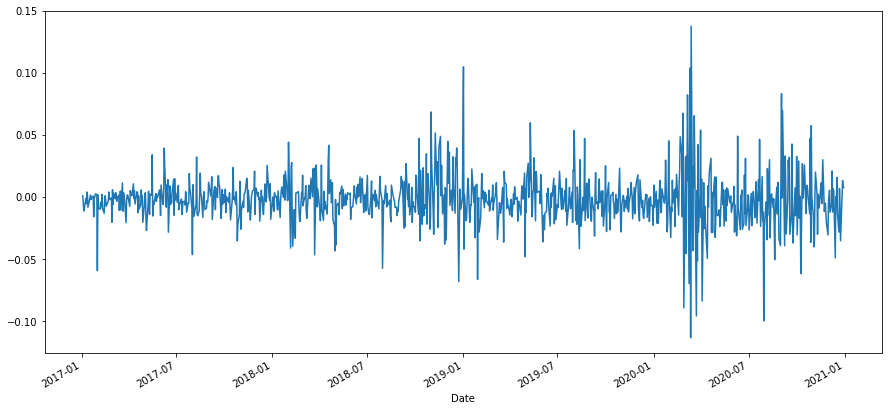

In [74]:
data_hist['return'].plot(kind='line', figsize=(15, 7))

<AxesSubplot:ylabel='Frequency'>

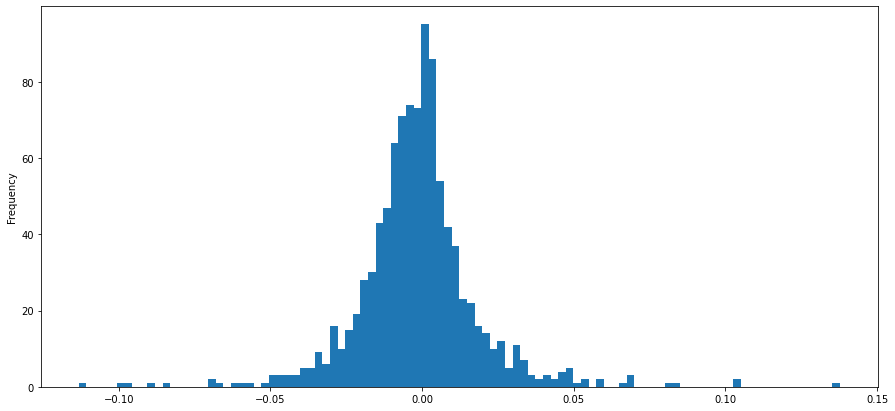

In [77]:
data_hist['return'].plot(kind='hist', bins = 100, figsize=(15, 7))

In [78]:
import seaborn as sns

<AxesSubplot:xlabel='return', ylabel='Count'>

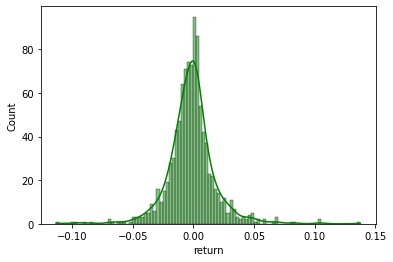

In [84]:
sns.histplot(data=data_hist, x='return', bins=100, kde=True, color='green') 

In [85]:
data_hist.head()

Symbols,AAPL,return,hist_vol
Date,,,
2017-01-03,27.372362,0.001120,NaN
2017-01-04,27.341724,-0.005073,NaN
2017-01-05,27.480770,-0.011086,NaN
2017-01-06,27.787130,-0.009118,NaN
2017-01-09,28.041647,-0.001008,NaN


In [36]:
CI = float(input('Confidenece Interval: ')) / 100
Time = int(input('Time Horizen: '))
confidence_level = stats.norm.ppf(CI)
horizon = np.sqrt(Time)


data_hist['hist_VaR'] = data_hist['hist_vol']* confidence_level * horizon 

Confidenece Interval: 99
Time Horizen: 1


In [37]:
data_hist.tail()

Symbols,AAPL,return,hist_vol,hist_VaR
Date,,,,
2020-12-24,131.352829,0.007683,0.029477,0.068573
2020-12-28,136.050766,0.035141,0.029548,0.068738
2020-12-29,134.239273,-0.013404,0.029537,0.068714
2020-12-30,133.094650,-0.008563,0.029535,0.068709
2020-12-31,132.069473,-0.007732,0.029540,0.068720


In [38]:
data_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2017-01-03 to 2020-12-31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AAPL      1007 non-null   float64
 1   return    1006 non-null   float64
 2   hist_vol  757 non-null    float64
 3   hist_VaR  757 non-null    float64
dtypes: float64(4)
memory usage: 39.3 KB


In [39]:
data_hist['hist_VaR'].tail()*100

Date
2020-12-24    6.857260
2020-12-28    6.873794
2020-12-29    6.871373
2020-12-30    6.870932
2020-12-31    6.872047
Name: hist_VaR, dtype: float64

<AxesSubplot:xlabel='Date'>

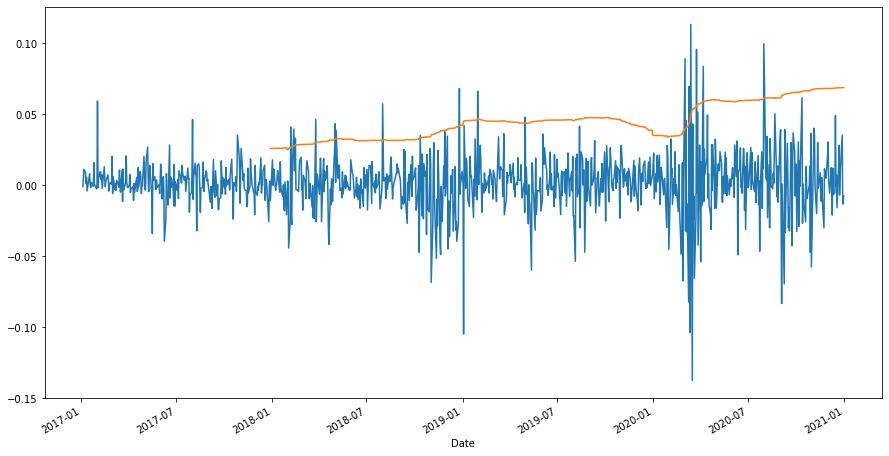

In [40]:
data_hist['return'].plot(figsize=(15,8))
data_hist['hist_VaR'].plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

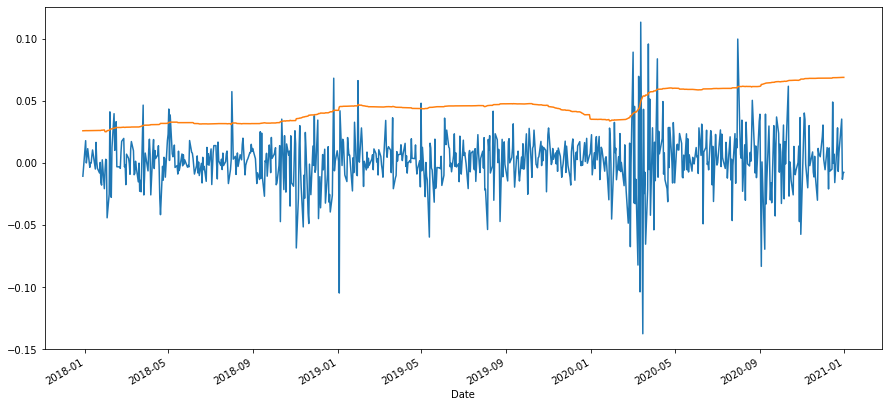

In [41]:
data_hist['return'][data_hist['hist_VaR'].count()-507:].plot(figsize=(15,7))
data_hist['hist_VaR'].plot(figsize=(15,7))

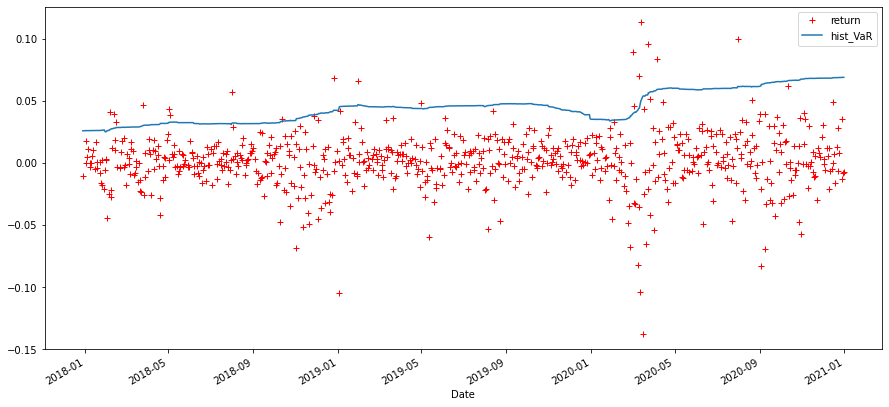

In [42]:
data_hist['return'][data_hist['hist_VaR'].count()-507:].plot(figsize=(15,7), style='+', color='red')
data_hist['hist_VaR'].plot(figsize=(15,7))
plt.legend()
plt.show()